In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Definir la función para el pulso rectangular
def pulso_rectangular(t, ancho):
    return np.where(np.abs(t) <= ancho/2, 1, 0)

In [13]:
# Definir la función para el pulso sinc en el dominio temporal
def pulso_sinc(t):
    return np.sinc(t)

In [14]:
# Definir la función para el pulso de coseno elevado
def pulso_coseno_elevado(t, alpha, Ts):
    numerador = np.sin(np.pi * t * (1 - alpha) / Ts) + 4 * alpha * t / Ts * np.cos(np.pi * t * (1 + alpha) / Ts)
    denominador = np.pi * t * (1 - (4 * alpha * t / Ts) ** 2) / Ts
    return np.where(np.abs(denominador) > 0, numerador / denominador, 1)

In [15]:
# Transformada de Fourier
def transformada_fourier(senal, t):
    dt = t[1] - t[0]
    f = np.fft.fftfreq(len(t), d=dt)
    return np.fft.fftshift(f), np.fft.fftshift(np.abs(np.fft.fft(senal)))

In [16]:
# Definir el dominio temporal
t = np.linspace(-1, 1, 1000)

In [17]:
# Pulsos
rectangular = pulso_rectangular(t, 0.5)
sinc = pulso_sinc(t)
coseno_elevado = pulso_coseno_elevado(t, 0.5, 0.5)

In [18]:
# Transformadas de Fourier
f_rectangular, FT_rectangular = transformada_fourier(rectangular, t)
f_sinc, FT_sinc = transformada_fourier(sinc, t)
f_coseno_elevado, FT_coseno_elevado = transformada_fourier(coseno_elevado, t)

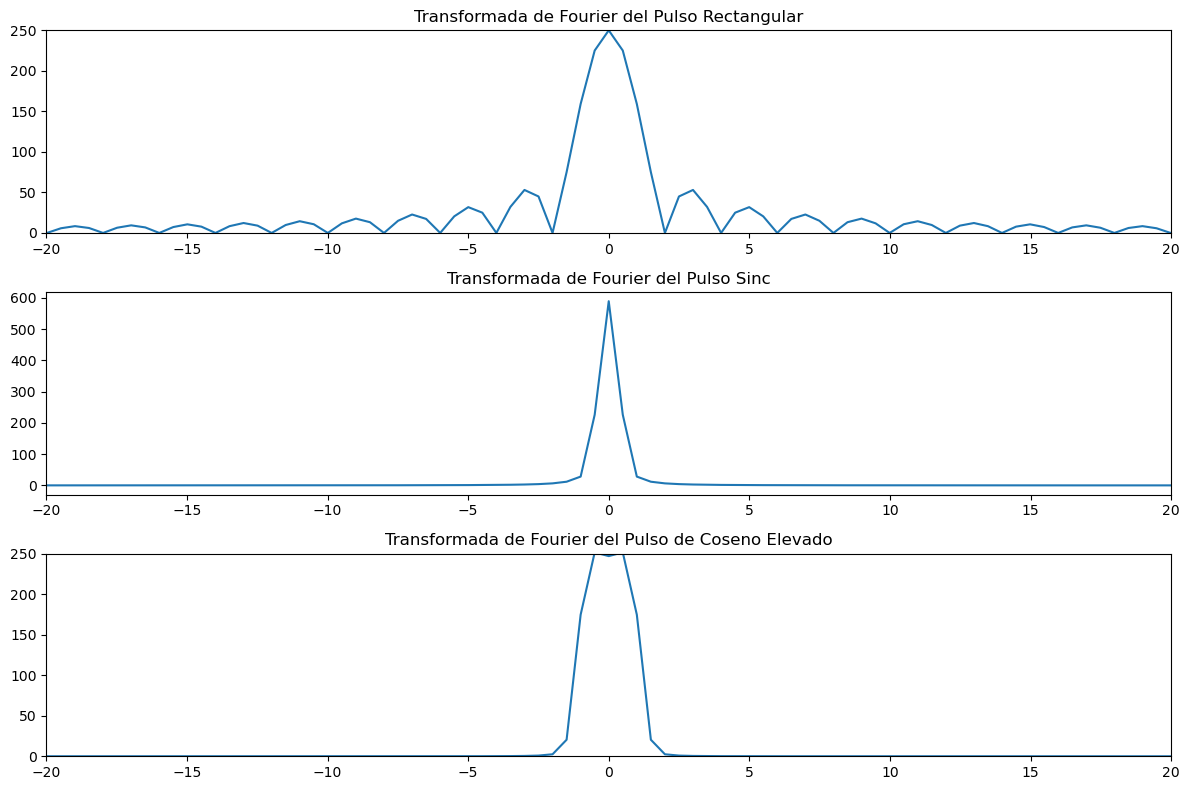

In [19]:
# Gráficos de las transformadas de Fourier
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(f_rectangular, FT_rectangular)
plt.xlim(-20, 20)       # Ajustar escala de frecuencia
plt.ylim(0, 250)   # Ajustar escala de amplitud
plt.title("Transformada de Fourier del Pulso Rectangular")

plt.subplot(3, 1, 2)
plt.plot(f_sinc, FT_sinc)
plt.xlim(-20, 20)        # Ajustar escala de frecuencia
plt.title("Transformada de Fourier del Pulso Sinc")

plt.subplot(3, 1, 3)
plt.plot(f_coseno_elevado, FT_coseno_elevado)
plt.xlim(-20, 20)   # Ajustar escala de frecuencia
plt.ylim(0, 250)   # Ajustar escala de amplitud
plt.title("Transformada de Fourier del Pulso de Coseno Elevado")

plt.tight_layout()
plt.show()

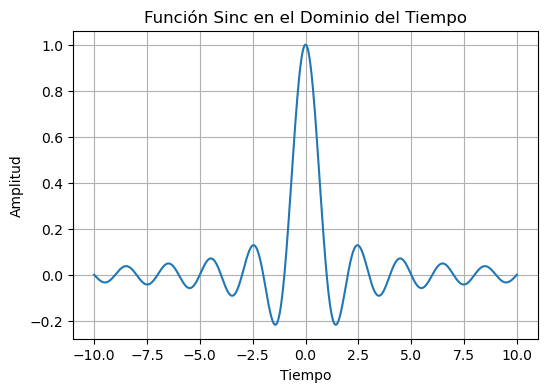

In [20]:
# Gráfico del pulso sinc en el dominio del tiempo

# Definir el dominio temporal más amplio para visualizar mejor el pulso sinc
t_sinc = np.linspace(-10, 10, 1000)

# Generar la señal sinc
senal_sinc = pulso_sinc(t_sinc)

# Graficar la función sinc en el dominio temporal
plt.figure(figsize=(6, 4))
plt.plot(t_sinc, senal_sinc)
plt.title("Función Sinc en el Dominio del Tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

In [21]:
from scipy.integrate import quad

In [22]:
def espectro_pulso_rectangular(f, T):
    return T * np.sinc(f * T)

In [23]:
def porcentaje_energia(fb, T, energia_total):
    integrando = lambda f: np.abs(espectro_pulso_rectangular(f, T))**2
    energia, _ = quad(integrando, -fb, fb)
    return energia / energia_total

In [24]:
T = 1
energia_total = T
fb = np.linspace(0, 5/T, 500)
porcentaje_energia = [porcentaje_energia(f, T, energia_total) for f in fb]

In [25]:
# Encontrar la frecuencia donde se contiene el 90% de la energía
for i, pct in enumerate(porcentaje_energia):
    if pct >= 0.9:
        medio_ancho_banda_90 = fb[i]
        break

print(f"Ancho de banda que contiene el 90% de la energía: {2 * medio_ancho_banda_90} Hz")


Ancho de banda que contiene el 90% de la energía: 1.7034068136272544 Hz


C:\Users\Facultad\AppData\Local\Temp\ipykernel_16088\950809949.py:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  energia_total, _ = quad(lambda f: (T * np.sinc(f * T))**2, -np.inf, np.inf)
C:\Users\Facultad\AppData\Local\Temp\ipykernel_16088\950809949.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain f

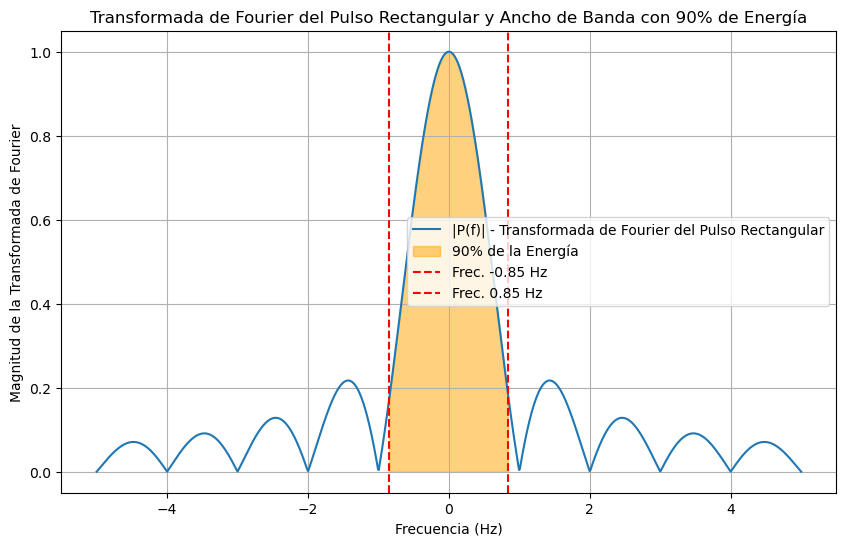

In [26]:
# Parámetros
T = 1  # Duración del pulso
f_max = 5 / T  # Frecuencia máxima para la gráfica
N = 1000  # Número de puntos para la gráfica

# Vector de frecuencias
f = np.linspace(-f_max, f_max, N)

# Transformada de Fourier del pulso rectangular (espectro del pulso)
P_f = T * np.sinc(f * T)

# Cálculo de la densidad espectral de potencia
PSD = np.abs(P_f)**2

# Cálculo de la energía total
energia_total, _ = quad(lambda f: (T * np.sinc(f * T))**2, -np.inf, np.inf)

# Cálculo de la energía acumulada
energia_acumulada = np.zeros_like(f)
for i in range(len(f)):
    energia_acumulada[i], _ = quad(lambda freq: (T * np.sinc(freq * T))**2, -np.inf, f[i])

# Normalización de la energía acumulada
energia_acumulada = energia_acumulada / energia_total

# Encontrar las frecuencias que contienen el 90% de la energía
indice_90_menor = np.where(energia_acumulada >= 0.05)[0][0]
indice_90_mayor = np.where(energia_acumulada >= 0.95)[0][0]

f_90_menor = f[indice_90_menor]
f_90_mayor = f[indice_90_mayor]

# Gráfica de la magnitud de la transformada de Fourier
plt.figure(figsize=(10, 6))
plt.plot(f, np.abs(P_f), label='|P(f)| - Transformada de Fourier del Pulso Rectangular')
plt.fill_between(f[indice_90_menor:indice_90_mayor], np.abs(P_f)[indice_90_menor:indice_90_mayor], color='orange', alpha=0.5, label='90% de la Energía')

# Líneas verticales que indican las frecuencias límites
plt.axvline(x=f_90_menor, color='r', linestyle='--', label=f'Frec. -{abs(f_90_menor):.2f} Hz')
plt.axvline(x=f_90_mayor, color='r', linestyle='--', label=f'Frec. {f_90_mayor:.2f} Hz')

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud de la Transformada de Fourier')
plt.title('Transformada de Fourier del Pulso Rectangular y Ancho de Banda con 90% de Energía')
plt.legend()
plt.grid(True)
plt.show()


solucion warnings

Ancho de banda que contiene el 90% de la energía: 1.7017 Hz


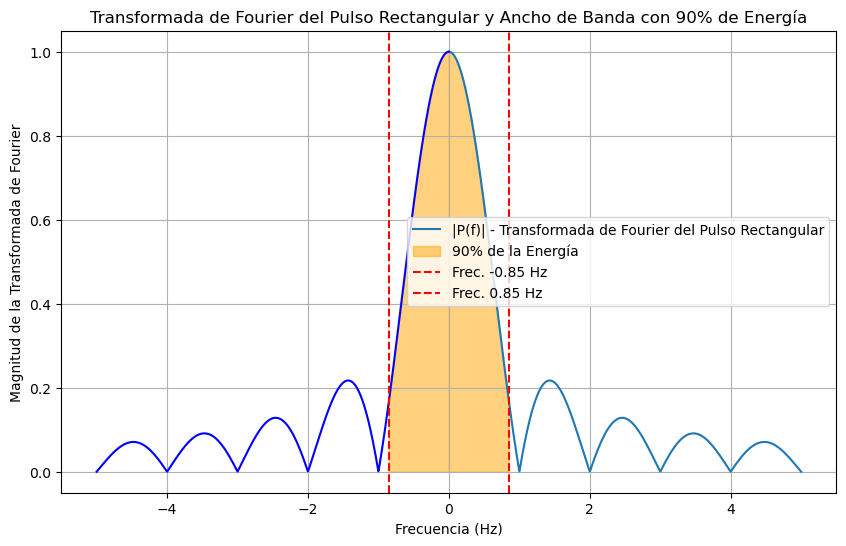

In [27]:
# Parámetros
T = 1  # Duración del pulso
f_max = 5 / T  # Frecuencia máxima para la gráfica
N = 1000  # Número de puntos para la gráfica

# Vector de frecuencias positivas
f = np.linspace(0, f_max, N)

# Transformada de Fourier del pulso rectangular (espectro del pulso)
P_f = T * np.sinc(f * T)

# Cálculo de la densidad espectral de potencia
PSD = np.abs(P_f)**2

# Energía total (usando resultado analítico)
energia_total = T

# Cálculo de la energía acumulada de manera simétrica
energia_acumulada = np.zeros_like(f)
for i in range(len(f)):
    # Integrar desde -f[i] hasta f[i] (integración simétrica)
    energia_acumulada[i], _ = quad(lambda freq: (T * np.sinc(freq * T))**2, -f[i], f[i], limit=100)

# Normalización de la energía acumulada
energia_acumulada = energia_acumulada / energia_total

# Encontrar la frecuencia que contiene el 90% de la energía
indice_90 = np.where(energia_acumulada >= 0.9)[0][0]
f_90 = f[indice_90]
ancho_banda_90 = 2 * f_90  # Ancho de banda total

print(f"Ancho de banda que contiene el 90% de la energía: {ancho_banda_90:.4f} Hz")

# Gráfica de la magnitud de la transformada de Fourier
plt.figure(figsize=(10, 6))

# Gráfica para frecuencias positivas
plt.plot(f, np.abs(P_f), label='|P(f)| - Transformada de Fourier del Pulso Rectangular')
plt.fill_between(f[:indice_90+1], np.abs(P_f[:indice_90+1]), color='orange', alpha=0.5, label='90% de la Energía')

# Gráfica para frecuencias negativas (reflexión)
plt.plot(-f, np.abs(P_f), color='blue')
plt.fill_between(-f[:indice_90+1], np.abs(P_f[:indice_90+1]), color='orange', alpha=0.5)

# Líneas verticales que indican las frecuencias límites
plt.axvline(x=-f_90, color='r', linestyle='--', label=f'Frec. -{f_90:.2f} Hz')
plt.axvline(x=f_90, color='r', linestyle='--', label=f'Frec. {f_90:.2f} Hz')

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud de la Transformada de Fourier')
plt.title('Transformada de Fourier del Pulso Rectangular y Ancho de Banda con 90% de Energía')
plt.legend()
plt.grid(True)
plt.show()


Ancho de banda que contiene el 90% de la energía: 0.9009 Hz


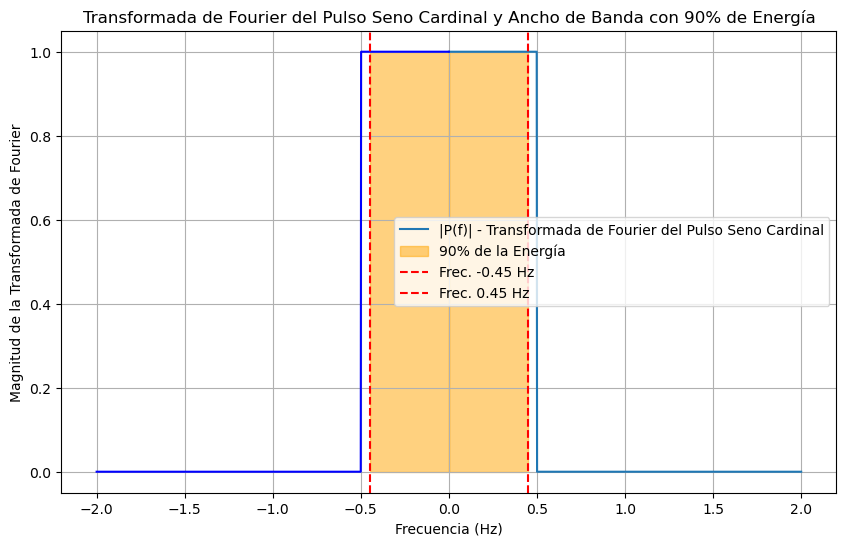

In [2]:
# Parámetros
T = 1  # Duración del pulso
f_max = 2 / T  # Frecuencia máxima para la gráfica
N = 1000  # Número de puntos para la gráfica

# Vector de frecuencias positivas
f = np.linspace(0, f_max, N)

# Transformada de Fourier del pulso seno cardinal (espectro rectangular)
P_f = T * np.where(f <= (1 / (2 * T)), 1, 0)

# Cálculo de la densidad espectral de potencia
PSD = np.abs(P_f)**2

# Energía total (usando resultado analítico)
energia_total = T

# Cálculo de la energía acumulada de manera simétrica
energia_acumulada = np.zeros_like(f)
for i in range(len(f)):
    # Integrar desde -f[i] hasta f[i] (integración simétrica)
    if f[i] <= (1 / (2 * T)):
        energia_acumulada[i] = PSD[0] * (2 * f[i])
    else:
        energia_acumulada[i] = PSD[0] * (1 / T)  # Energía total

# Normalización de la energía acumulada
energia_acumulada = energia_acumulada / energia_total

# Encontrar la frecuencia que contiene el 90% de la energía
indice_90 = np.where(energia_acumulada >= 0.9)[0][0]
f_90 = f[indice_90]
ancho_banda_90 = 2 * f_90  # Ancho de banda total

print(f"Ancho de banda que contiene el 90% de la energía: {ancho_banda_90:.4f} Hz")

# Gráfica de la magnitud de la transformada de Fourier
plt.figure(figsize=(10, 6))

# Gráfica para frecuencias positivas
plt.plot(f, np.abs(P_f), label='|P(f)| - Transformada de Fourier del Pulso Seno Cardinal')
plt.fill_between(f[:indice_90+1], np.abs(P_f[:indice_90+1]), color='orange', alpha=0.5, label='90% de la Energía')

# Gráfica para frecuencias negativas (reflexión)
plt.plot(-f, np.abs(P_f), color='blue')
plt.fill_between(-f[:indice_90+1], np.abs(P_f[:indice_90+1]), color='orange', alpha=0.5)

# Líneas verticales que indican las frecuencias límites
plt.axvline(x=-f_90, color='r', linestyle='--', label=f'Frec. -{f_90:.2f} Hz')
plt.axvline(x=f_90, color='r', linestyle='--', label=f'Frec. {f_90:.2f} Hz')

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud de la Transformada de Fourier')
plt.title('Transformada de Fourier del Pulso Seno Cardinal y Ancho de Banda con 90% de Energía')
plt.legend()
plt.grid(True)
plt.show()


Alpha = 0.25: Ancho de banda que contiene el 90% de la energía: 0.8509 Hz


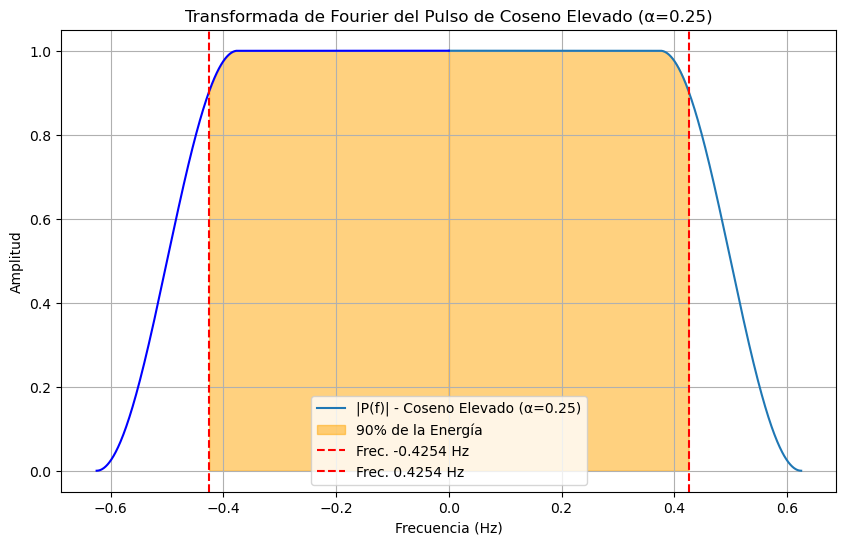

Alpha = 0.5: Ancho de banda que contiene el 90% de la energía: 0.8483 Hz


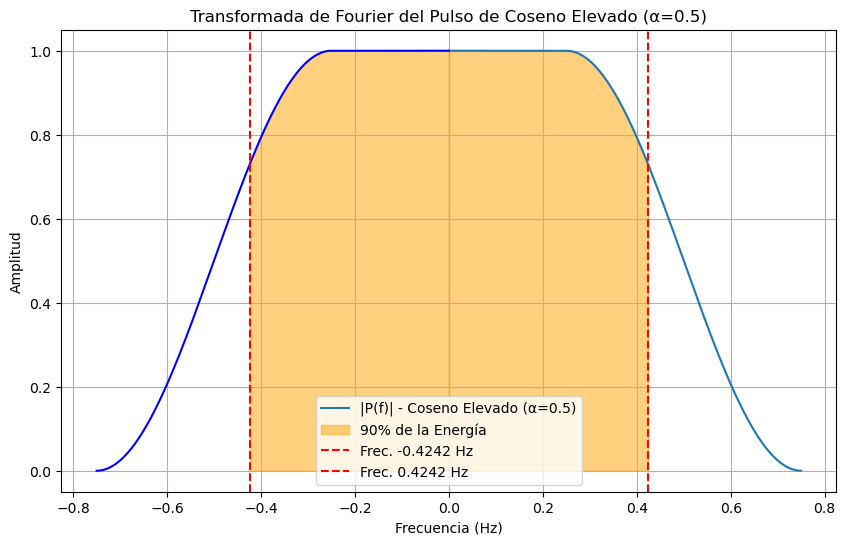

Alpha = 0.75: Ancho de banda que contiene el 90% de la energía: 0.8794 Hz


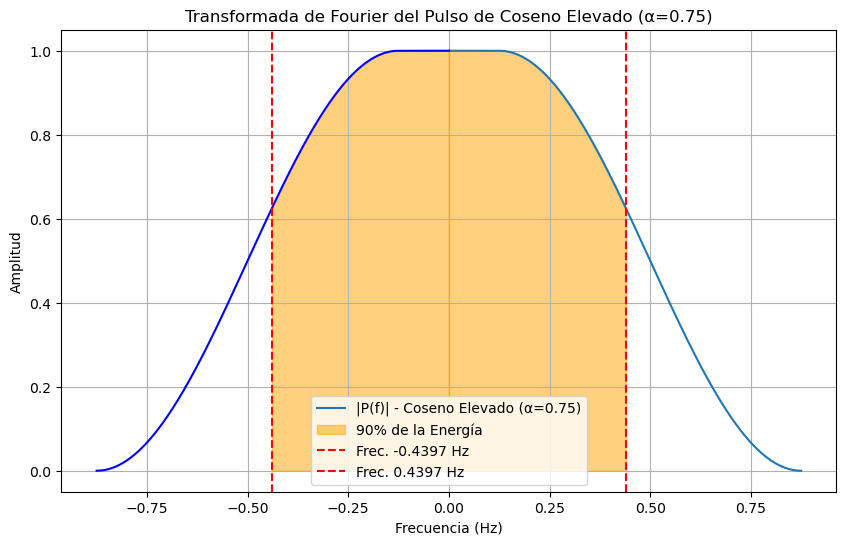

In [6]:
# Función para calcular P(f) del pulso de coseno elevado
def P_f_coseno_elevado(f, T, alpha):
    B = (1 + alpha) / (2 * T)
    f0 = (1 - alpha) / (2 * T)
    abs_f = np.abs(f)
    if abs_f <= f0:
        return T
    elif f0 < abs_f <= B:
        return (T / 2) * (1 + np.cos(np.pi * T / alpha * (abs_f - f0)))
    else:
        return 0

# Parámetros
T = 1
alpha_values = [0.25, 0.5, 0.75]
N = 1000

for alpha in alpha_values:
    B = (1 + alpha) / (2 * T)  # Ancho de banda máximo
    f = np.linspace(0, B, N)
    
    # Calculamos P(f) para cada frecuencia
    P_f = np.array([P_f_coseno_elevado(fi, T, alpha) for fi in f])
    
    # Densidad espectral de potencia
    PSD = np.abs(P_f)**2
    
    # Energía total (integral de PSD en todo el espectro)
    energia_total = np.trapz(PSD, f) * 2  # Multiplicamos por 2 por simetría
    
    # Energía acumulada
    energia_acumulada = np.zeros_like(f)
    for i in range(len(f)):
        energia_acumulada[i] = np.trapz(PSD[:i+1], f[:i+1]) * 2  # Multiplicamos por 2 por simetría
    
    # Normalización
    energia_acumulada = energia_acumulada / energia_total
    
    # Encontrar la frecuencia que contiene el 90% de la energía
    indice_90 = np.where(energia_acumulada >= 0.9)[0][0]
    f_90 = f[indice_90]
    ancho_banda_90 = 2 * f_90
    
    print(f"Alpha = {alpha}: Ancho de banda que contiene el 90% de la energía: {ancho_banda_90:.4f} Hz")
    
    # Gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(f, np.abs(P_f), label=f'|P(f)| - Coseno Elevado (α={alpha})')
    plt.fill_between(f[:indice_90+1], np.abs(P_f[:indice_90+1]), color='orange', alpha=0.5, label='90% de la Energía')
    
    # Reflexión para frecuencias negativas
    plt.plot(-f, np.abs(P_f), color='blue')
    plt.fill_between(-f[:indice_90+1], np.abs(P_f[:indice_90+1]), color='orange', alpha=0.5)
    
    # Líneas verticales
    plt.axvline(x=-f_90, color='r', linestyle='--', label=f'Frec. -{f_90:.4f} Hz')
    plt.axvline(x=f_90, color='r', linestyle='--', label=f'Frec. {f_90:.4f} Hz')
    
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.title(f'Transformada de Fourier del Pulso de Coseno Elevado (α={alpha})')
    plt.legend()
    plt.grid(True)
    plt.show()


Ancho de banda que contiene el 90% de la energía: 0.9910 Hz


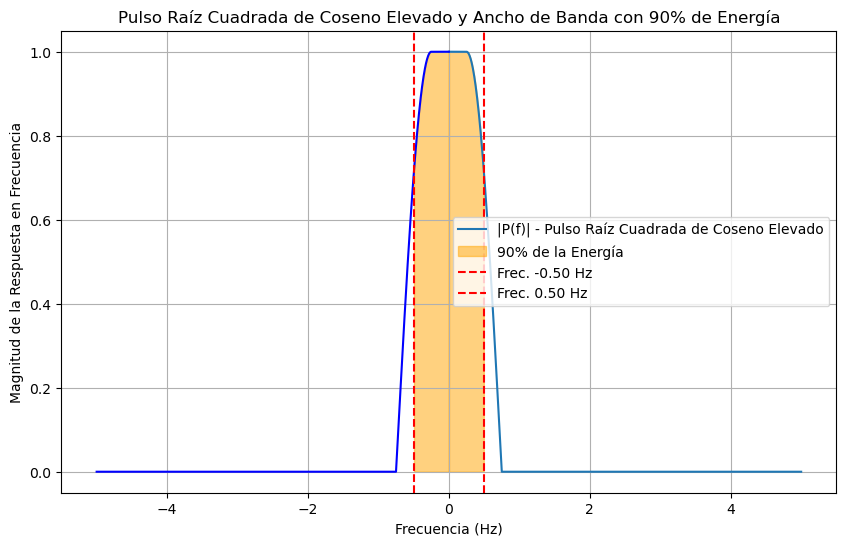

In [8]:
# Parámetros
T = 1  # Duración del símbolo
alpha = 0.5  # Factor de roll-off (puedes variar entre 0 y 1)
f_max = 5 / T  # Frecuencia máxima para la gráfica
N = 1000  # Número de puntos para la gráfica

# Vector de frecuencias positivas
f = np.linspace(0, f_max, N)

# Función de la respuesta en frecuencia del pulso raíz cuadrada de coseno elevado
def P_f_raiz_coseno_elevado(f, T, alpha):
    B = (1 + alpha) / (2 * T)
    f0 = (1 - alpha) / (2 * T)
    abs_f = np.abs(f)
    H_f = np.zeros_like(abs_f)
    condition1 = abs_f < f0
    condition2 = (abs_f >= f0) & (abs_f <= B)
    H_f[condition1] = np.sqrt(T)
    H_f[condition2] = np.sqrt((T / 2) * (1 + np.cos(np.pi * T / alpha * (abs_f[condition2] - f0))))
    # Fuera del rango, H_f ya es cero
    return H_f

# Cálculo de la respuesta en frecuencia
P_f = P_f_raiz_coseno_elevado(f, T, alpha)

# Densidad espectral de potencia
PSD = np.abs(P_f) ** 2

# Energía total (integración numérica)
B = (1 + alpha) / (2 * T)
# Integramos de 0 a B y multiplicamos por 2 por simetría
energia_total, _ = quad(lambda freq: (P_f_raiz_coseno_elevado(freq, T, alpha)) ** 2, 0, B, limit=1000)
energia_total *= 2  # Por simetría

# Cálculo de la energía acumulada de manera simétrica
energia_acumulada = np.zeros_like(f)
for i in range(len(f)):
    f_i = f[i]
    # Nos aseguramos de no exceder el ancho de banda máximo B
    if f_i > B:
        f_i = B
    energia_i, _ = quad(lambda freq: (P_f_raiz_coseno_elevado(freq, T, alpha)) ** 2, 0, f_i, limit=1000)
    energia_acumulada[i] = energia_i * 2  # Por simetría

# Normalización de la energía acumulada
energia_acumulada = energia_acumulada / energia_total

# Encontrar la frecuencia que contiene el 90% de la energía
indice_90 = np.where(energia_acumulada >= 0.9)[0][0]
f_90 = f[indice_90]
ancho_banda_90 = 2 * f_90  # Ancho de banda total desde -f_90 hasta f_90

print(f"Ancho de banda que contiene el 90% de la energía: {ancho_banda_90:.4f} Hz")

# Gráfica de la magnitud de la respuesta en frecuencia
plt.figure(figsize=(10, 6))

# Gráfica para frecuencias positivas
plt.plot(f, np.abs(P_f), label='|P(f)| - Pulso Raíz Cuadrada de Coseno Elevado')
plt.fill_between(f[:indice_90 + 1], np.abs(P_f[:indice_90 + 1]), color='orange', alpha=0.5, label='90% de la Energía')

# Gráfica para frecuencias negativas (reflexión)
plt.plot(-f, np.abs(P_f), color='blue')
plt.fill_between(-f[:indice_90 + 1], np.abs(P_f[:indice_90 + 1]), color='orange', alpha=0.5)

# Líneas verticales que indican las frecuencias límites
plt.axvline(x=-f_90, color='r', linestyle='--', label=f'Frec. -{f_90:.2f} Hz')
plt.axvline(x=f_90, color='r', linestyle='--', label=f'Frec. {f_90:.2f} Hz')

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud de la Respuesta en Frecuencia')
plt.title('Pulso Raíz Cuadrada de Coseno Elevado y Ancho de Banda con 90% de Energía')
plt.legend()
plt.grid(True)
plt.show()
